In [66]:
from hubmap.visualization import visualize_checkpoint
from hubmap.visualization import visualize_random_image, ImageType
from hubmap.visualization import visualize_image
from hubmap.models import DPT
from hubmap.models.dpt import Backbone

(<Figure size 400x400 with 1 Axes>, <Figure size 400x400 with 1 Axes>)

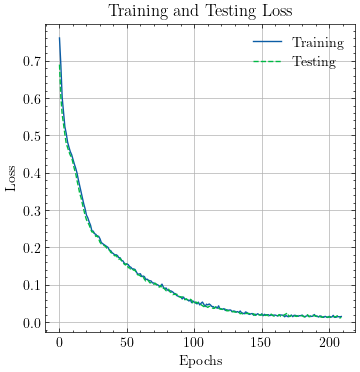

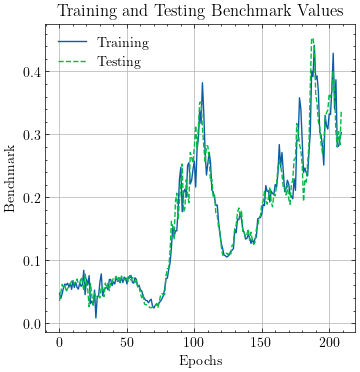

In [67]:
visualize_checkpoint("fct_overfit_img_size_64.pt")

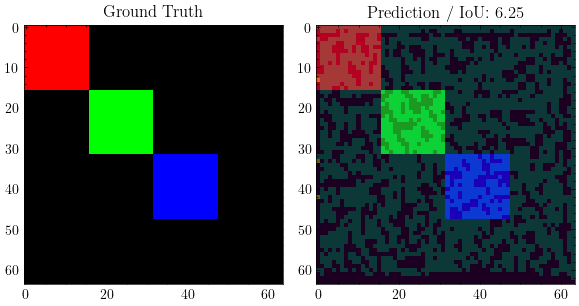

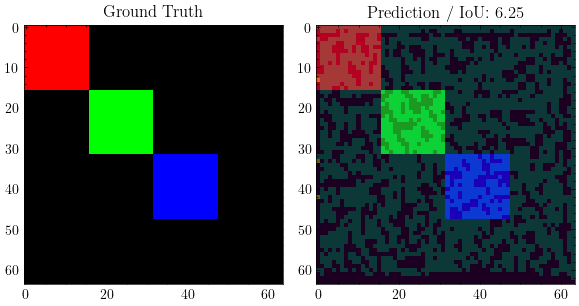

In [68]:
from hubmap.models import FCT
from hubmap.models import init_weights

model = FCT(in_channels=3, num_classes=3)
model.apply(init_weights)
visualize_image(model, "fct_trials", "/home/jflxb/Documents/lmu/HuBMAP/image.pt", "/home/jflxb/Documents/lmu/HuBMAP/target.pt", pred_idx=2)

In [49]:
import torch
from pathlib import Path

image = torch.load(Path("/home/jflxb/Documents/lmu/HuBMAP/image.pt"))
target = torch.load(Path("/home/jflxb/Documents/lmu/HuBMAP/target.pt"))

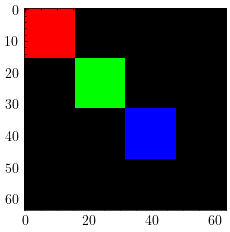

In [50]:
import matplotlib.pyplot as plt

plt.imshow(image.squeeze().permute(1, 2, 0))

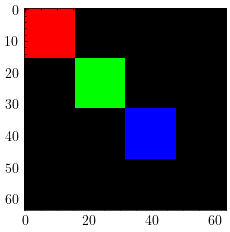

In [51]:
plt.imshow(target.squeeze().permute(1, 2, 0))

In [52]:
p1, p2, f = model(image)

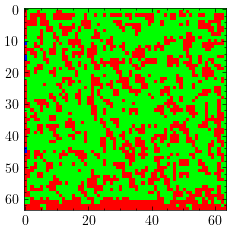

In [53]:
import torch.nn.functional as F

probs = F.softmax(f, dim=1)
classes = torch.argmax(probs, dim=1, keepdims=True)
classes_per_channel = torch.zeros_like(f)
classes_per_channel.scatter_(1, classes, 1)

plt.imshow(classes_per_channel.squeeze().permute(1, 2, 0).detach().cpu())

In [42]:
from copy import deepcopy
IMG_DIM = 64
image = torch.zeros((1, 3, IMG_DIM, IMG_DIM))
box_size = IMG_DIM // 4
image[:, 0, 0:box_size, 0:box_size] = 1
image[:, 1, box_size:2*box_size, box_size:2*box_size] = 1
image[:, 2, 2*box_size:3*box_size, 2*box_size:3*box_size] = 1
target = deepcopy(image)

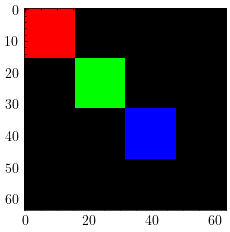

In [43]:
plt.imshow(image[0].permute(1, 2, 0))

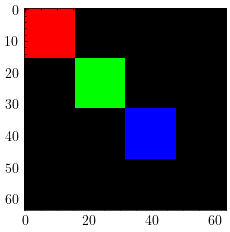

In [44]:
plt.imshow(target[0].permute(1, 2, 0))